In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")

# Estadisticas Basicas

In [13]:
num_filas, num_columnas = df.shape

tipos_variables = df.dtypes

print(f"📌 El dataset tiene {num_filas} filas y {num_columnas} columnas.\n")
print("📌 Tipos de variables:")
print(tipos_variables.value_counts())

📌 El dataset tiene 1460 filas y 81 columnas.

📌 Tipos de variables:
object     43
int64      35
float64     3
Name: count, dtype: int64


In [14]:
print("📌 Información del dataset:")
print(df.info())

print("\n📌 Primeras filas del dataset:")
print(df.head())

📌 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-n

In [11]:
df_numerico = df.select_dtypes(include=["number"])

resumen_estadistico = df_numerico.describe().T

resumen_estadistico["mediana"] = df_numerico.median()

print("📌 Resumen estadístico de variables numéricas:")
print(resumen_estadistico)


📌 Resumen estadístico de variables numéricas:
                count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     22

# Analisis de Valores Faltantes

In [16]:
valores_faltantes = df.isnull().sum()
porcentaje_faltantes = (valores_faltantes / len(df)) * 100

faltantes_df = pd.DataFrame({
    "Variable": df.columns,
    "Valores Faltantes": valores_faltantes,
    "Porcentaje (%)": porcentaje_faltantes
})

faltantes_df = faltantes_df[faltantes_df["Valores Faltantes"] > 0]

faltantes_df = faltantes_df.sort_values(by="Porcentaje (%)", ascending=False)

# Mostrar la tabla
print("📌 Cantidad y porcentaje de valores faltantes por variable:")
print(faltantes_df)

📌 Cantidad y porcentaje de valores faltantes por variable:
                  Variable  Valores Faltantes  Porcentaje (%)
PoolQC              PoolQC               1453       99.520548
MiscFeature    MiscFeature               1406       96.301370
Alley                Alley               1369       93.767123
Fence                Fence               1179       80.753425
MasVnrType      MasVnrType                872       59.726027
FireplaceQu    FireplaceQu                690       47.260274
LotFrontage    LotFrontage                259       17.739726
GarageType      GarageType                 81        5.547945
GarageYrBlt    GarageYrBlt                 81        5.547945
GarageFinish  GarageFinish                 81        5.547945
GarageQual      GarageQual                 81        5.547945
GarageCond      GarageCond                 81        5.547945
BsmtFinType2  BsmtFinType2                 38        2.602740
BsmtExposure  BsmtExposure                 38        2.602740
BsmtFinType

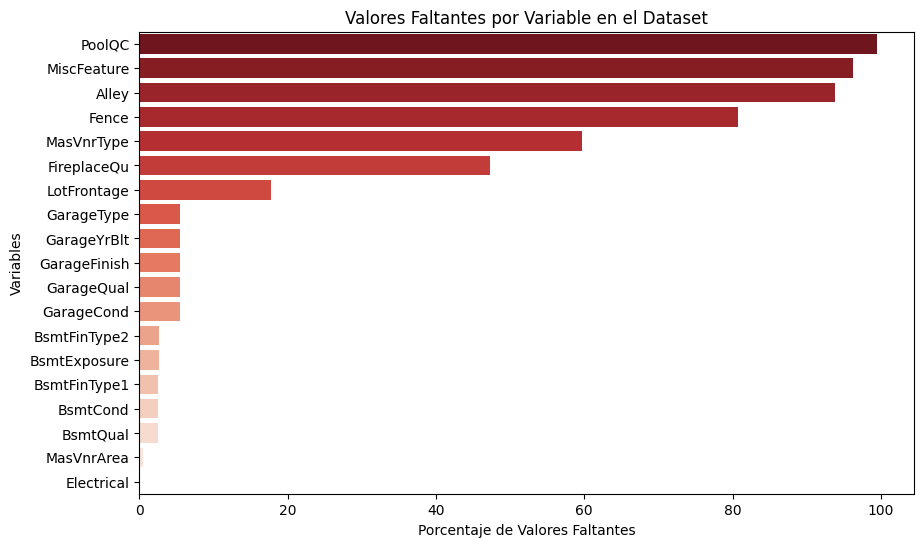

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=faltantes_df["Porcentaje (%)"],
    y=faltantes_df["Variable"],
    hue=faltantes_df["Variable"],
    legend=False,
    palette="Reds_r"
)

plt.xlabel("Porcentaje de Valores Faltantes")
plt.ylabel("Variables")
plt.title("Valores Faltantes por Variable en el Dataset")

plt.show()

# Detección de Resgistros Duplicados

In [22]:
duplicados = df[df.duplicated()]

# Mostrar resultados
print(f"📌 Número de filas duplicadas: {duplicados.shape[0]}")
print("\n📌 Muestras de filas duplicadas:")
print(duplicados.head())

📌 Número de filas duplicadas: 0

📌 Muestras de filas duplicadas:
Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType,

# Generación de Visualizaciones Iniciales

Variables númericas

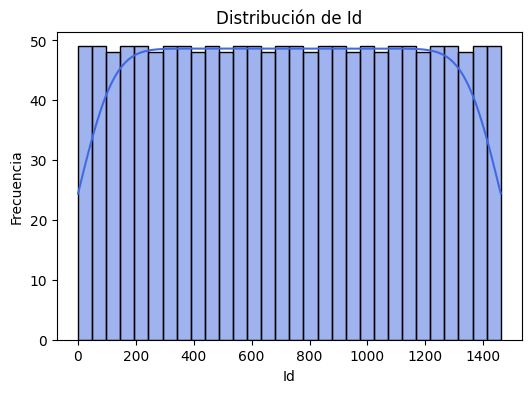

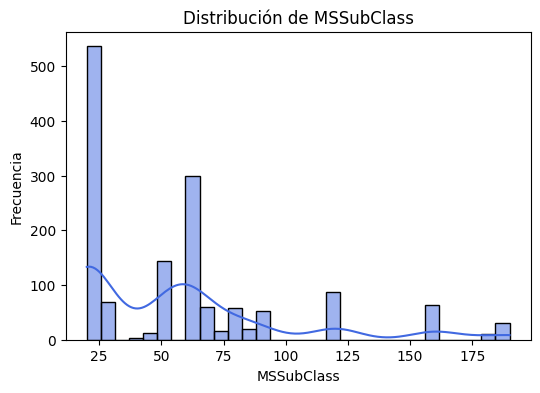

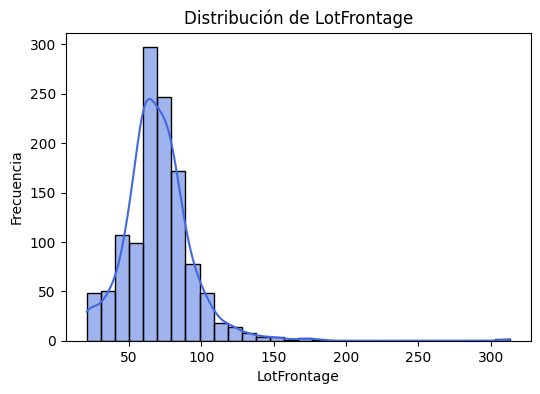

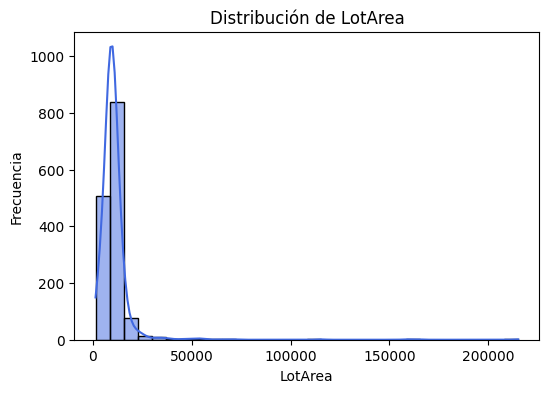

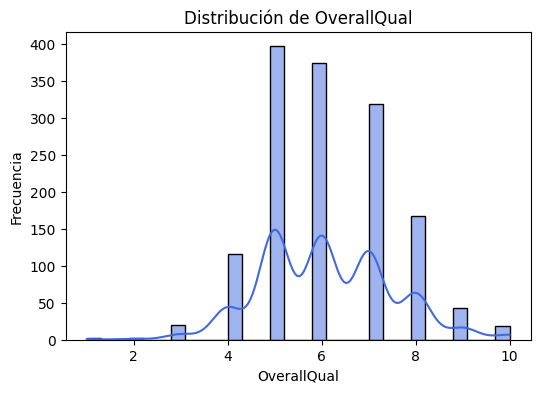

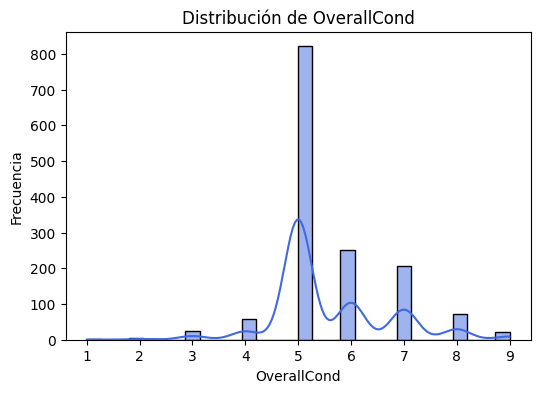

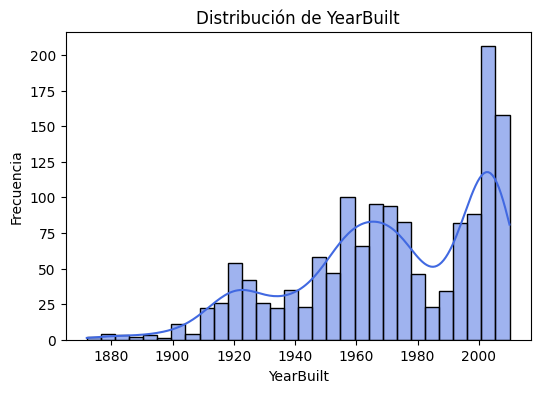

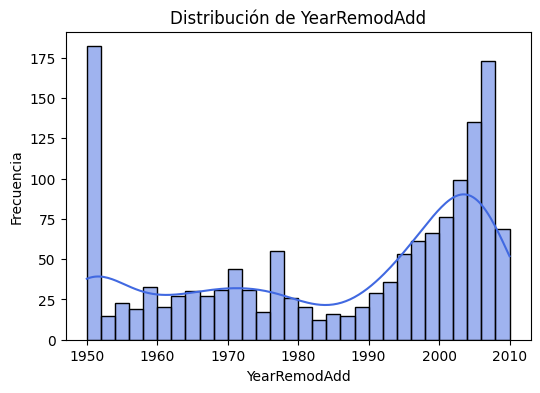

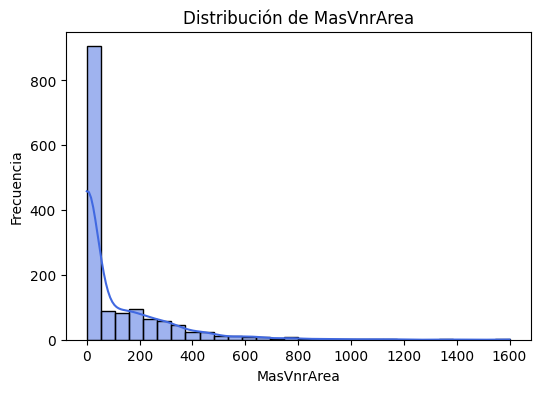

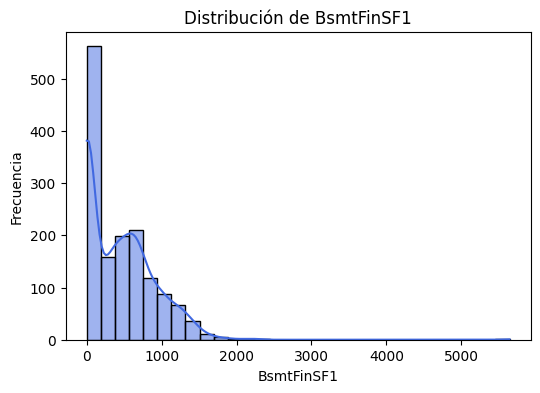

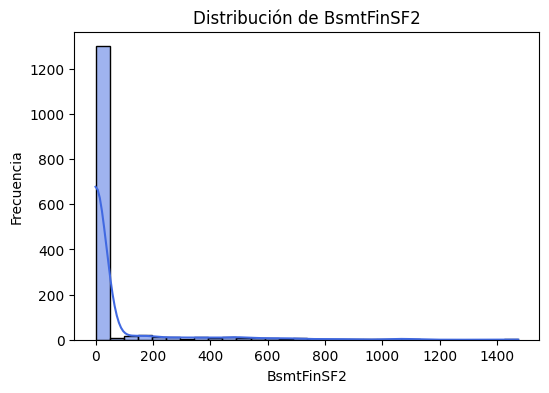

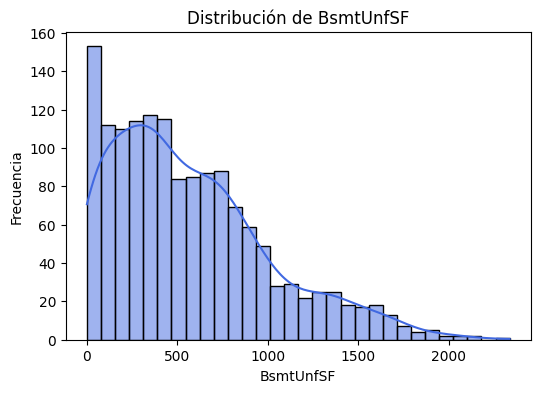

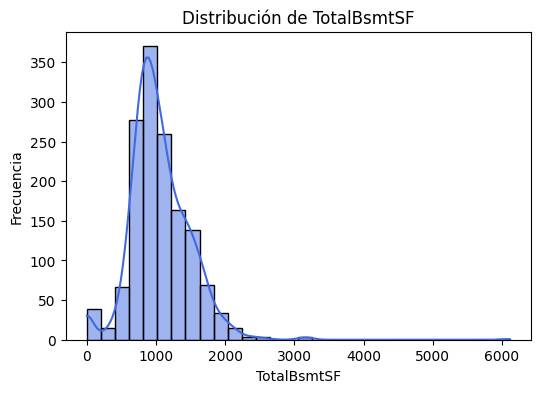

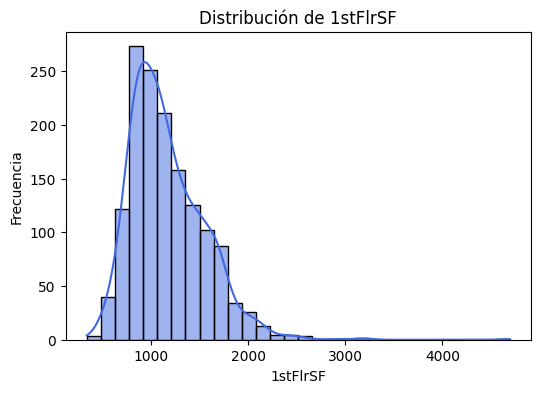

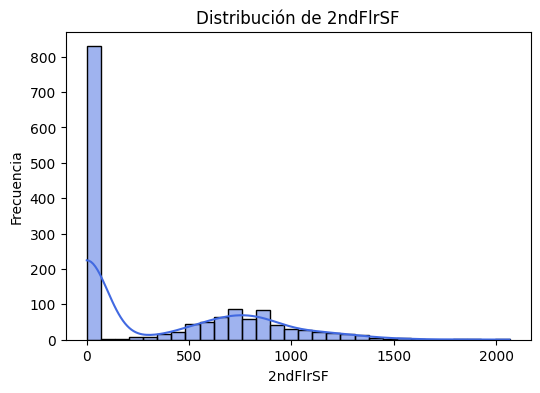

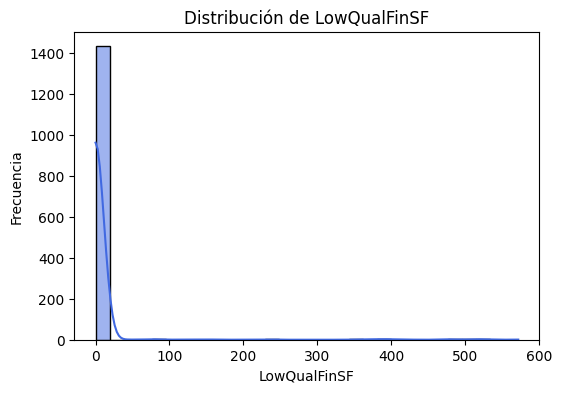

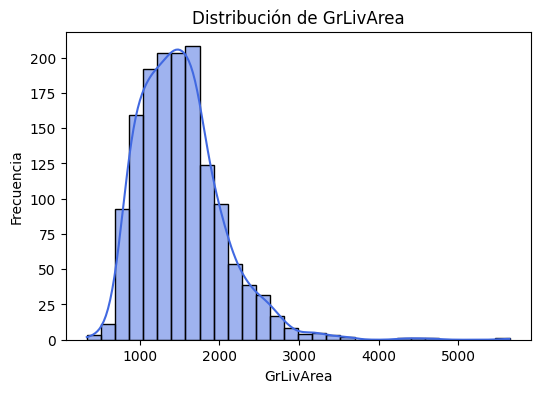

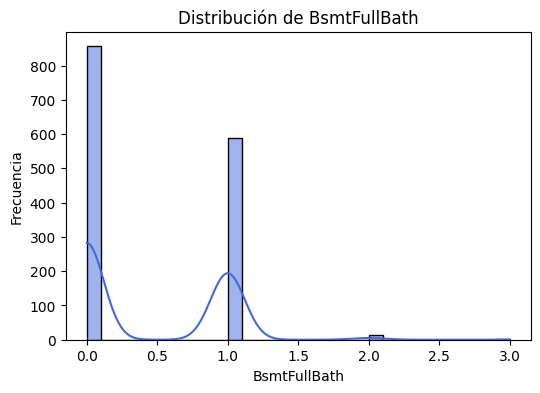

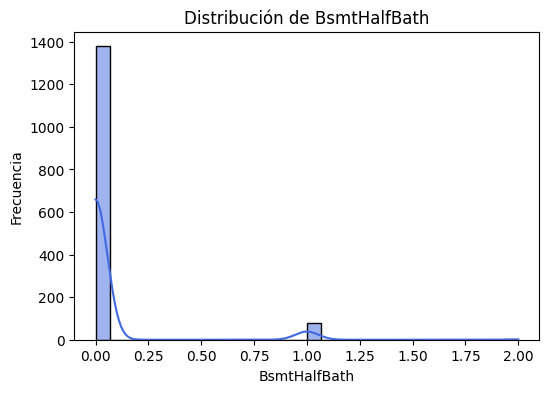

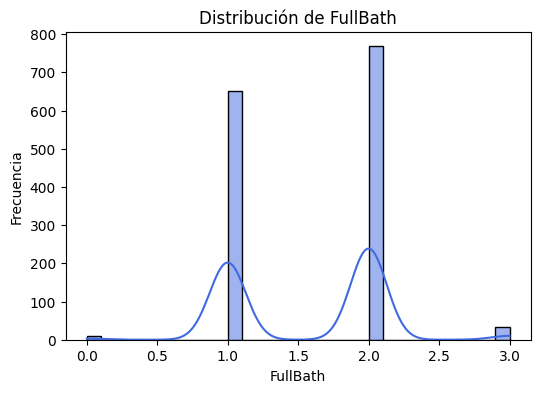

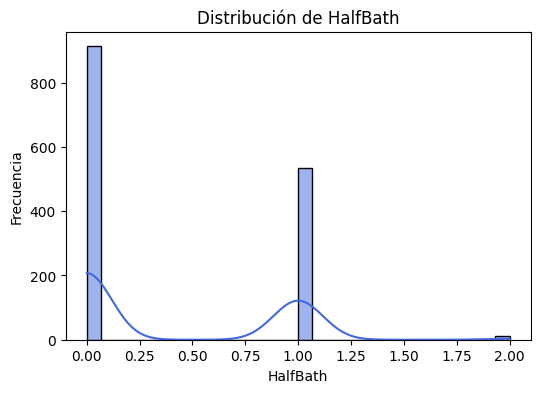

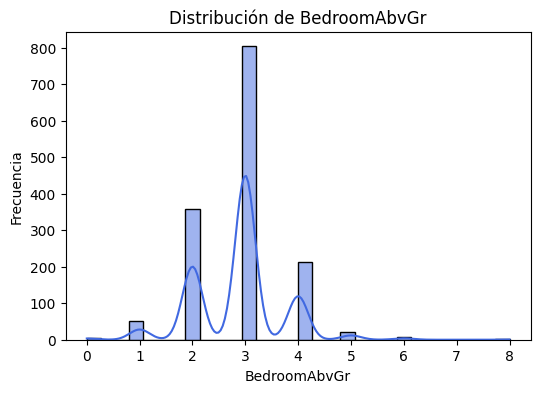

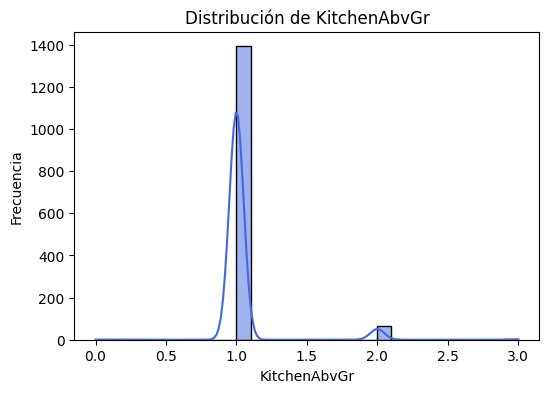

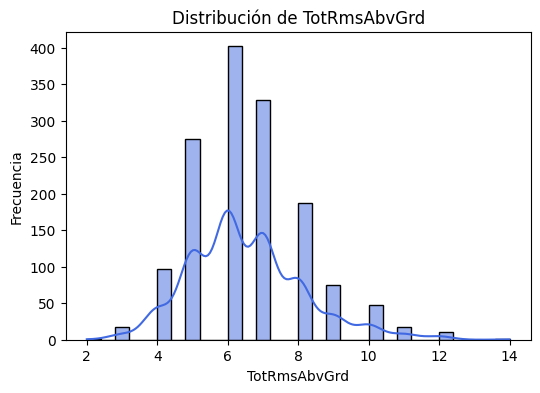

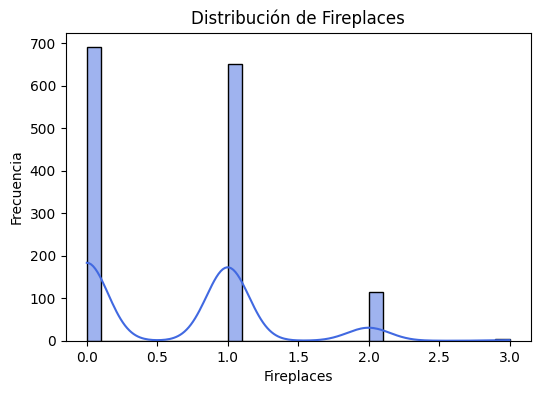

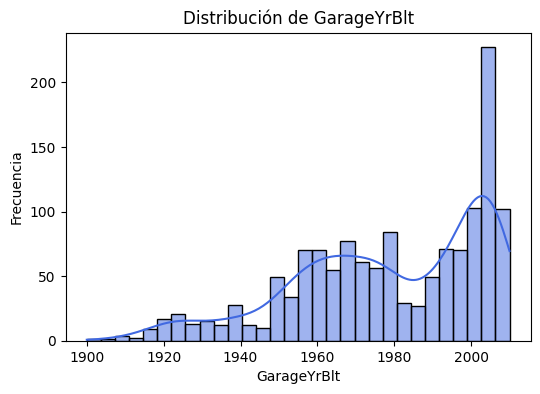

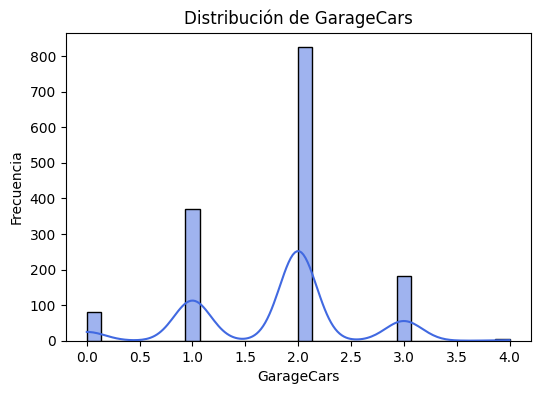

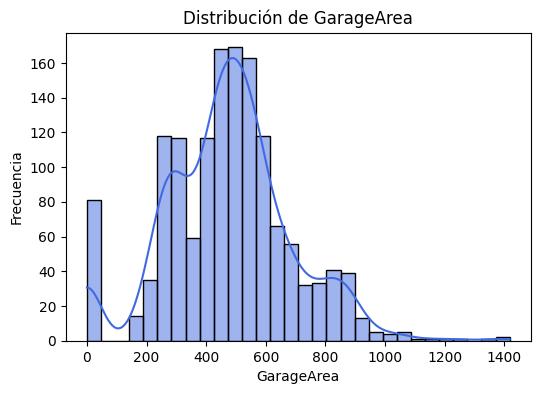

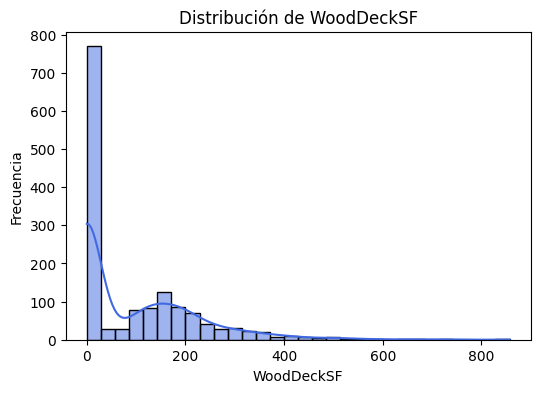

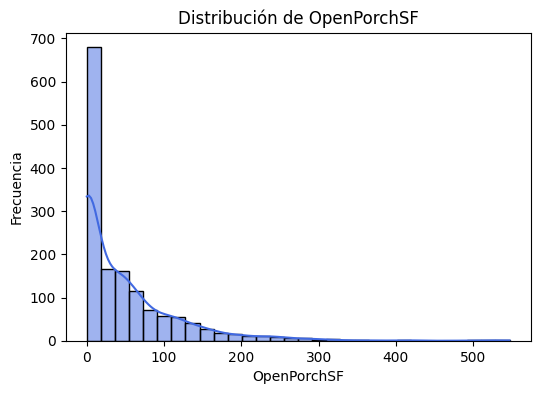

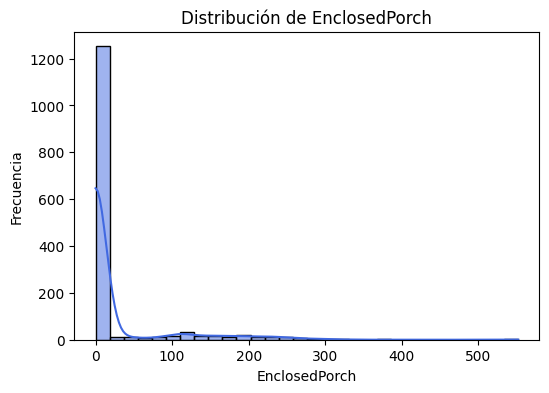

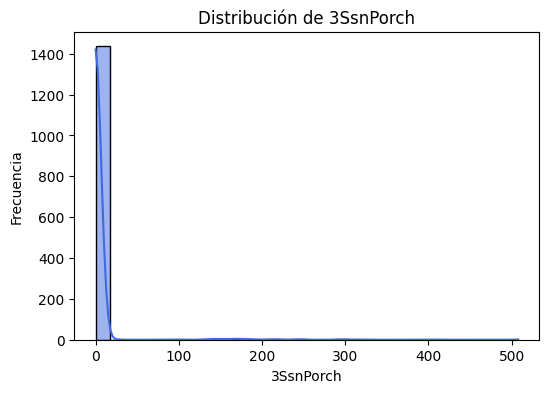

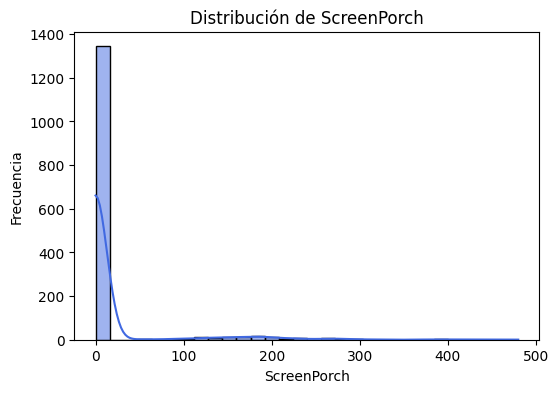

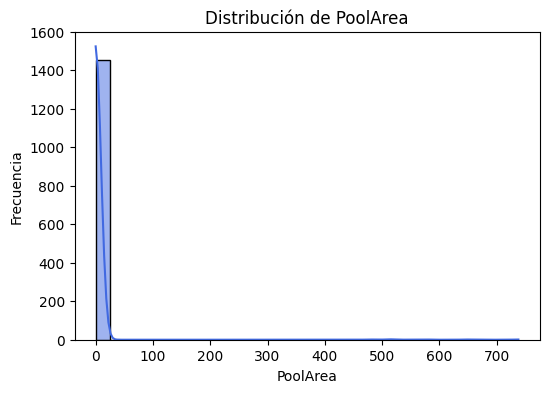

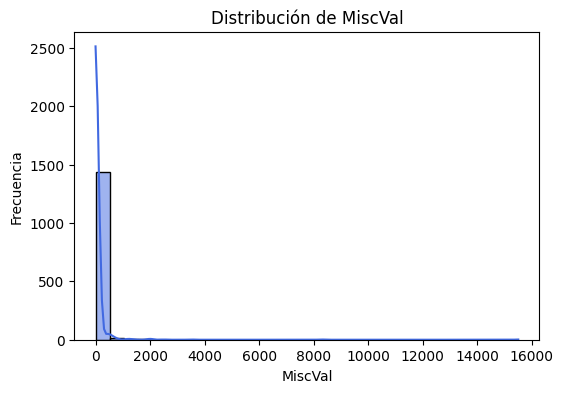

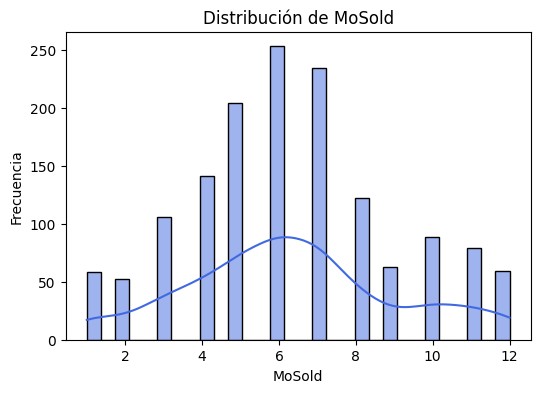

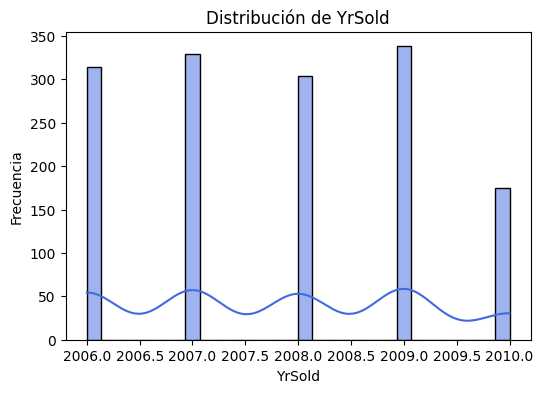

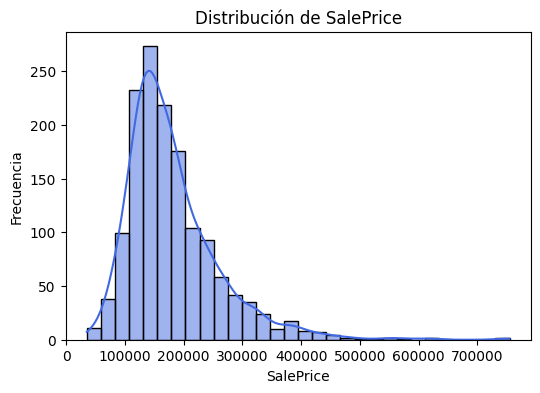

In [25]:
df_numerico = df.select_dtypes(include=["number"])

for col in df_numerico.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True, color="royalblue")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

Valores Atipicos

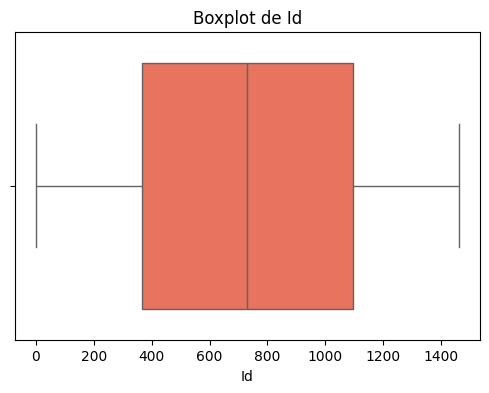

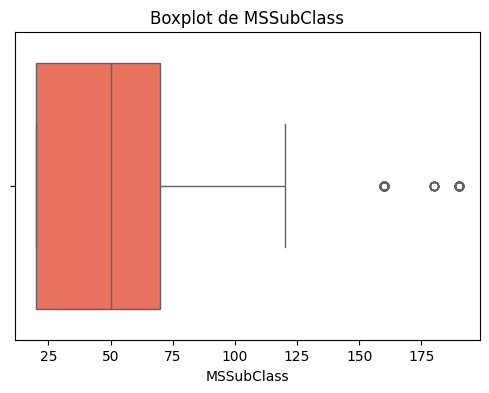

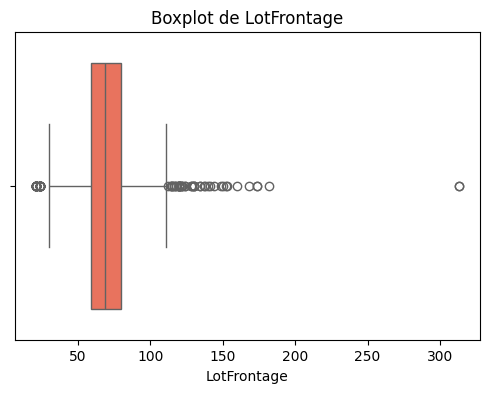

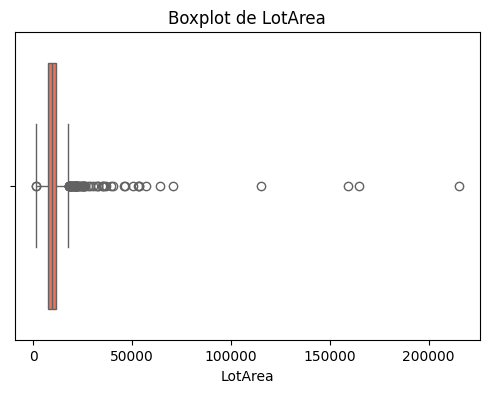

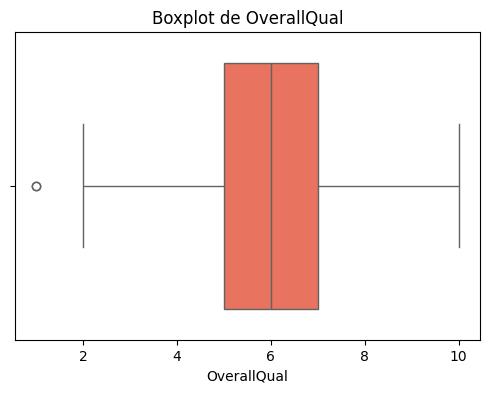

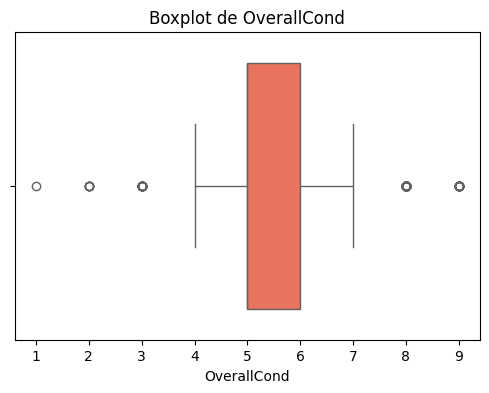

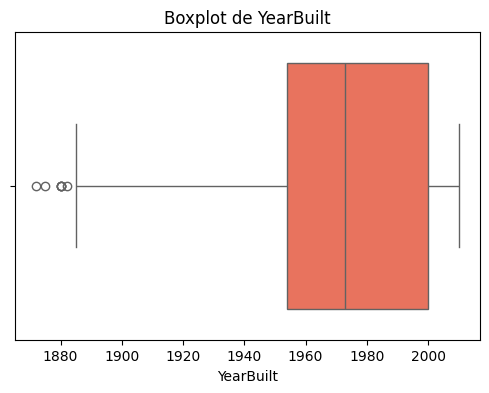

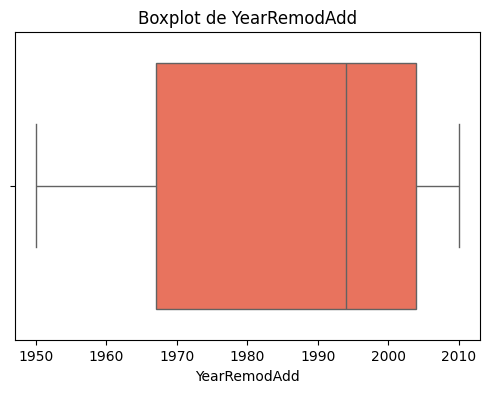

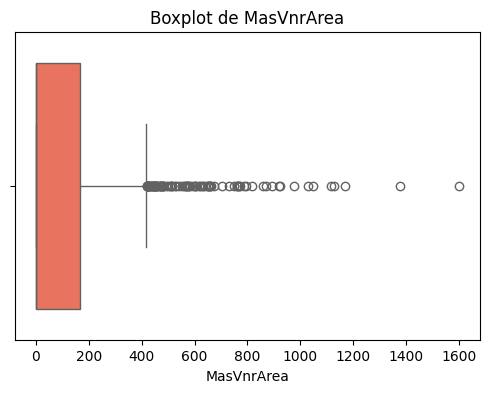

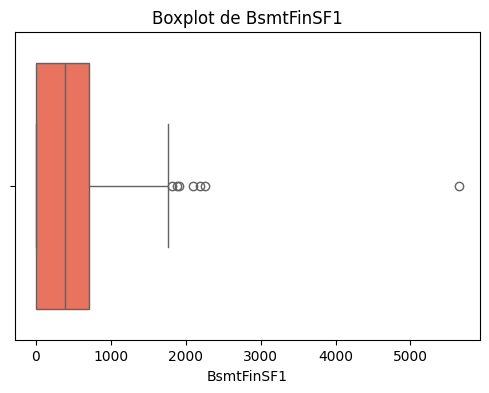

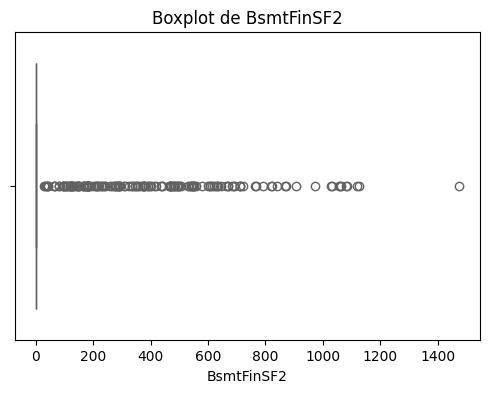

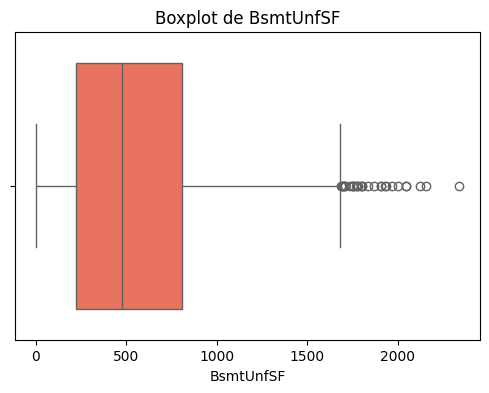

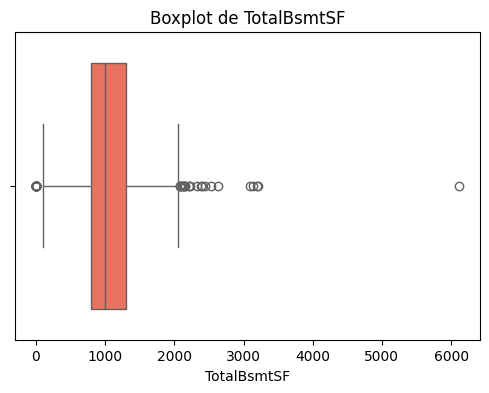

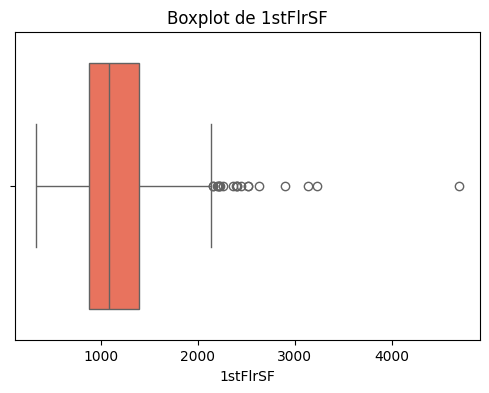

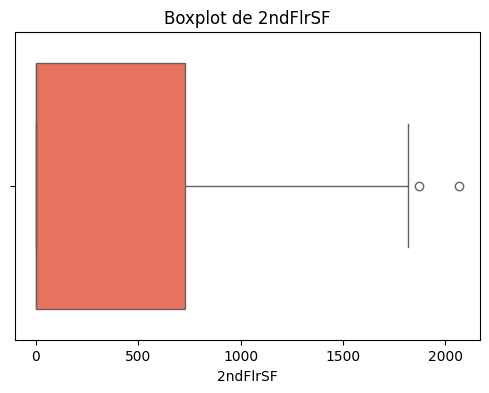

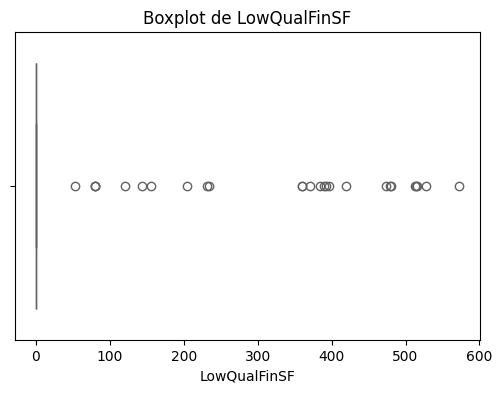

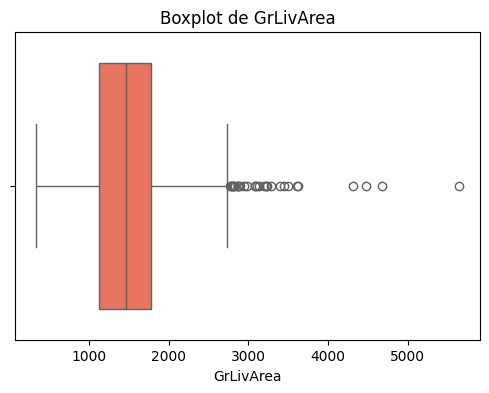

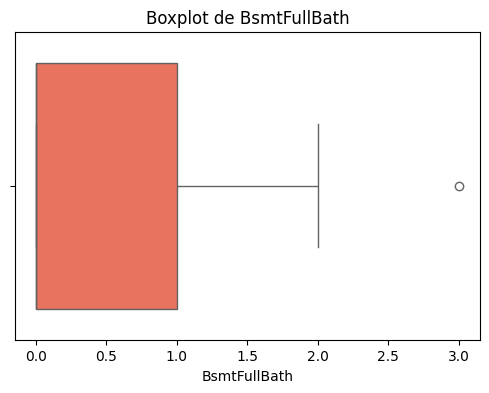

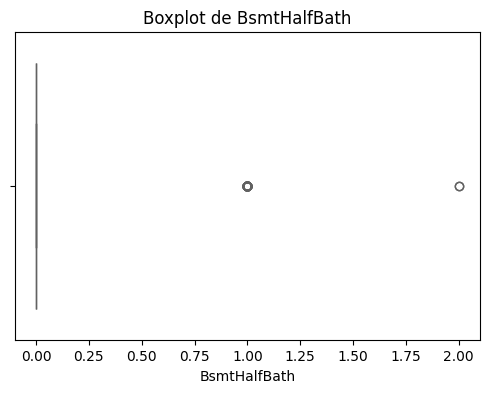

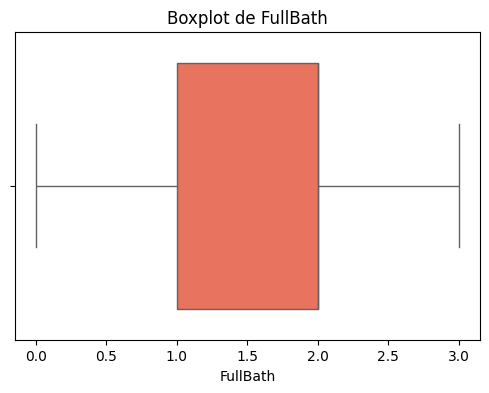

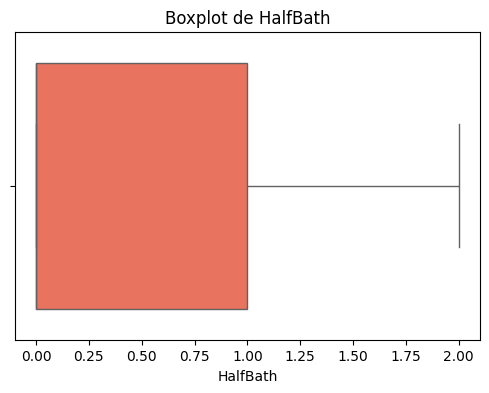

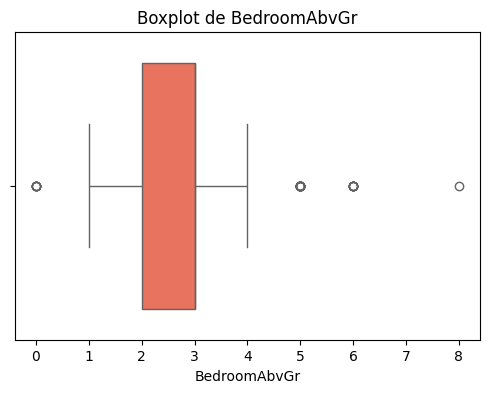

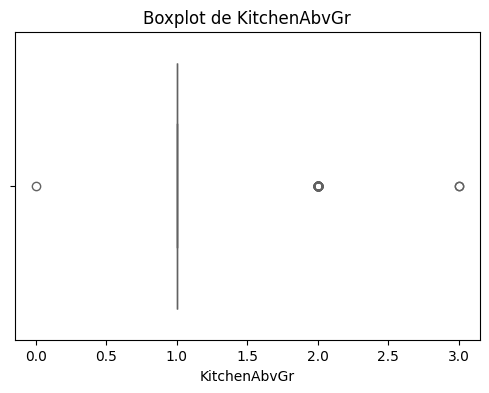

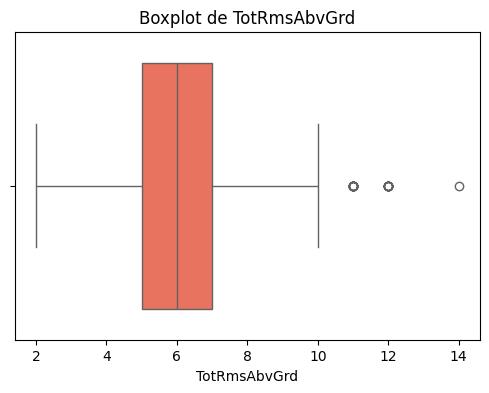

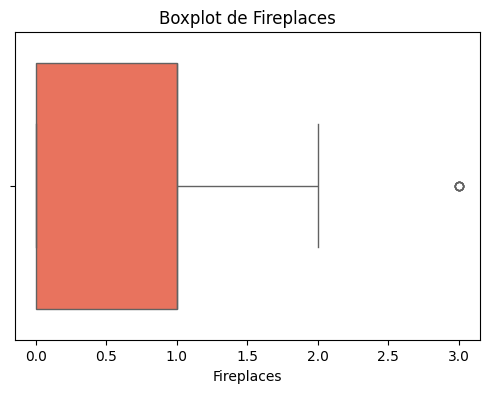

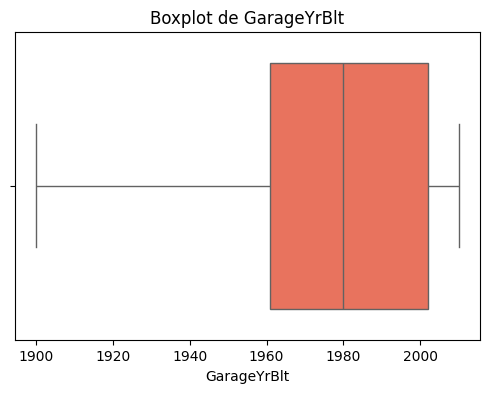

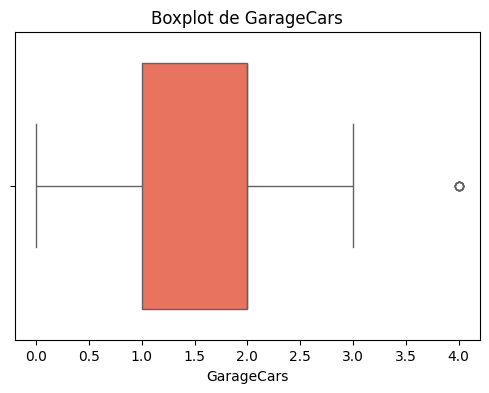

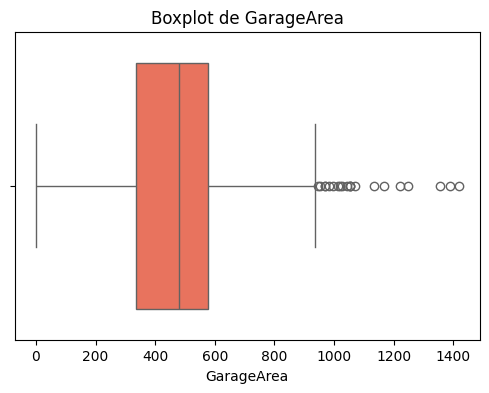

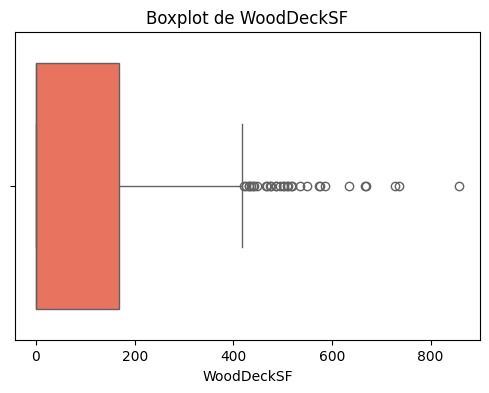

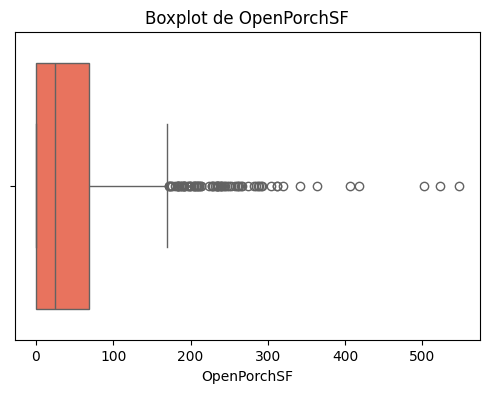

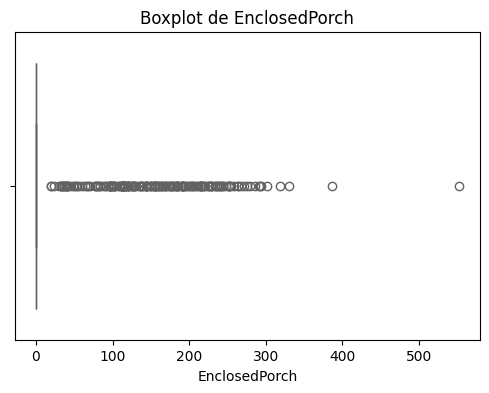

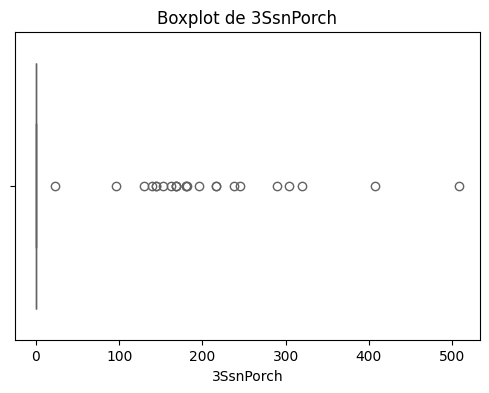

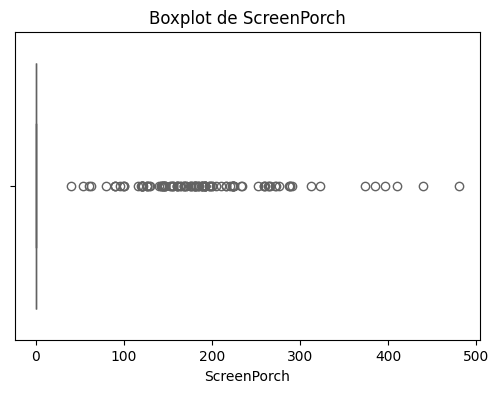

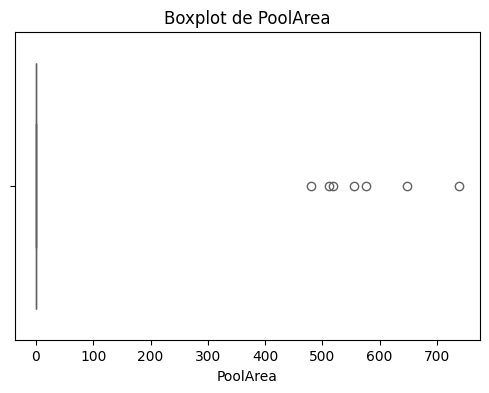

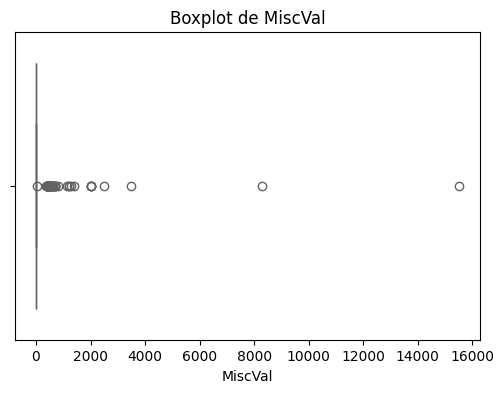

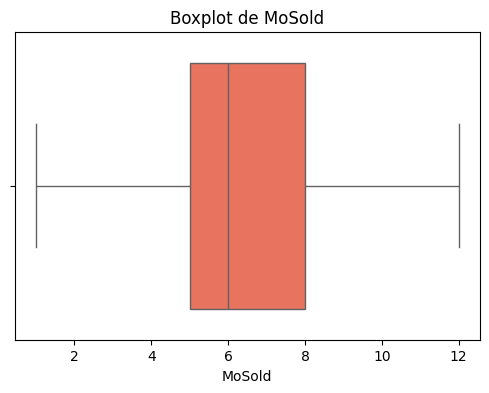

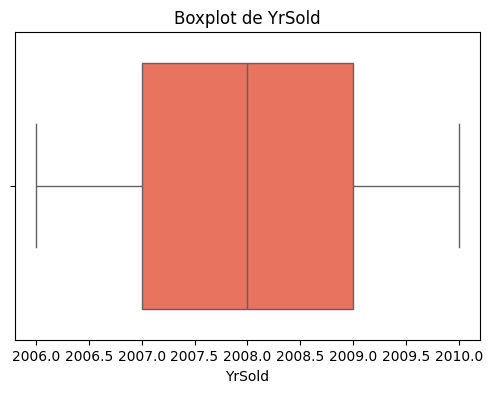

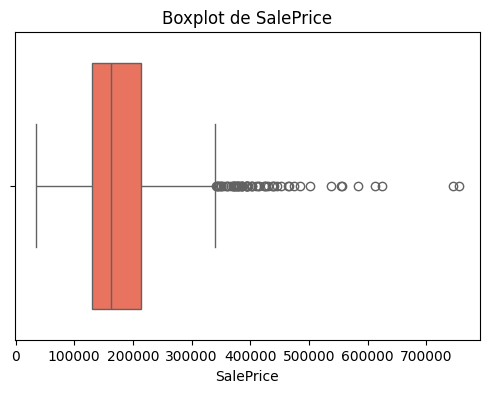

In [26]:
for col in df_numerico.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color="tomato")
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()

Variables Categoricas

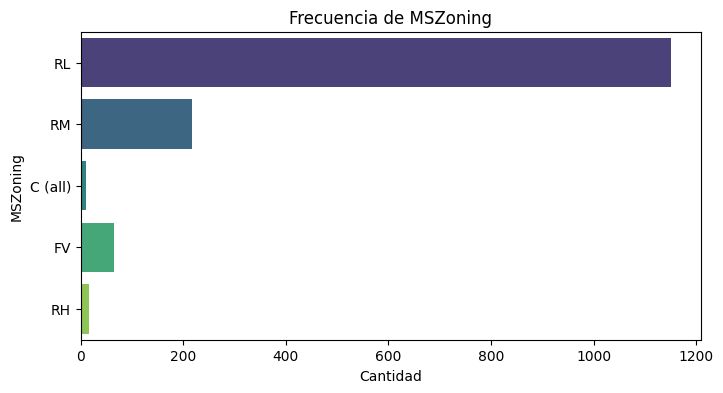

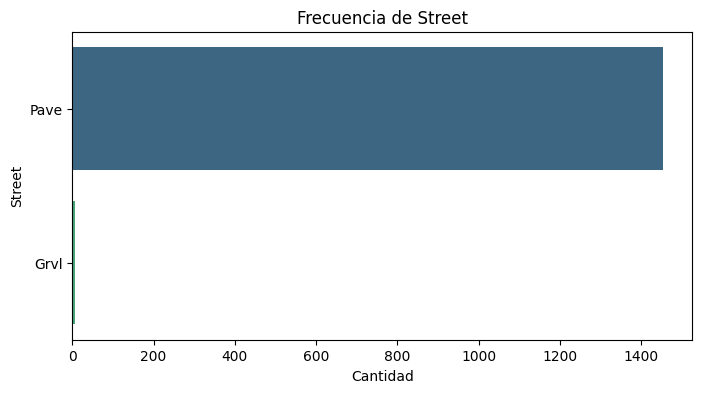

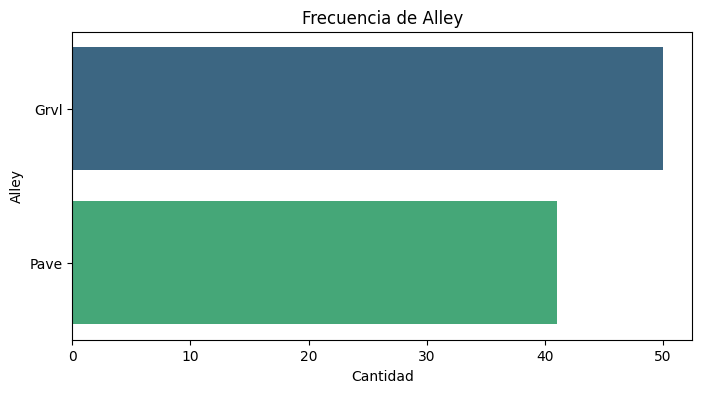

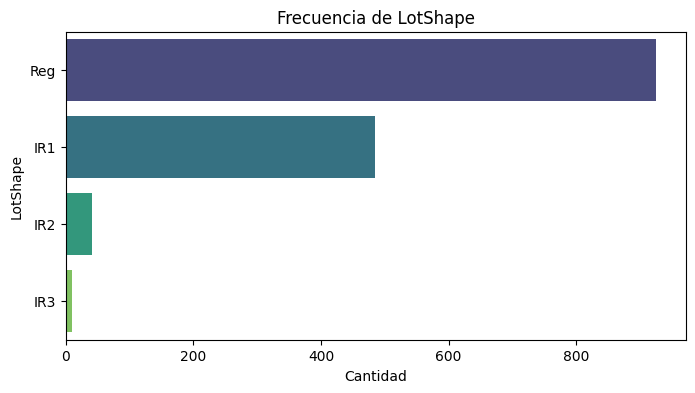

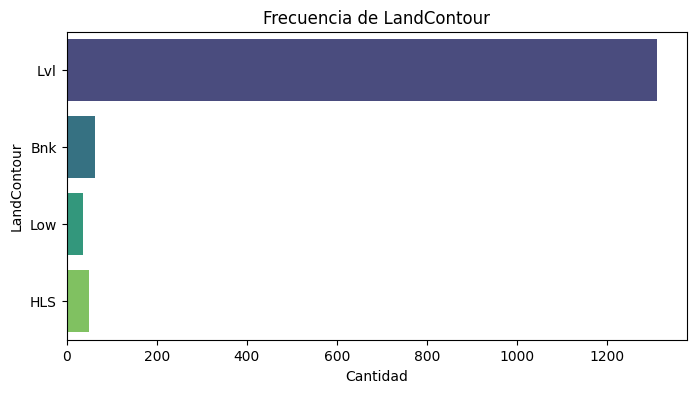

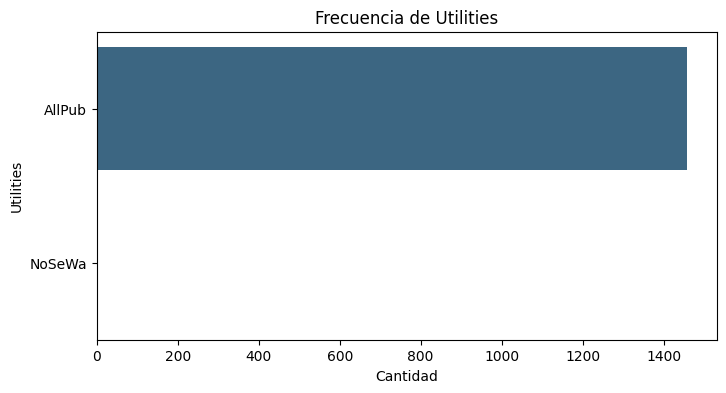

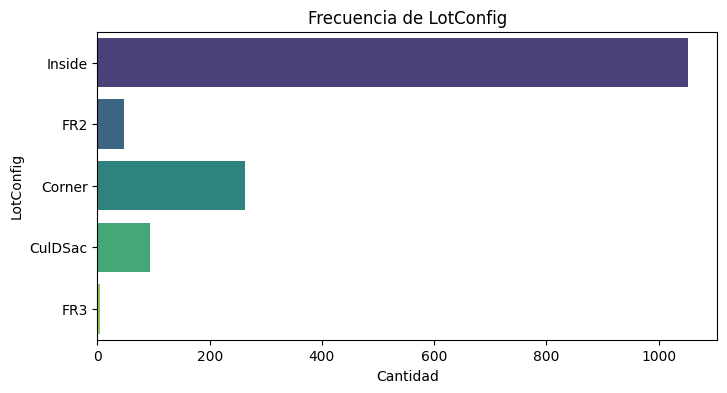

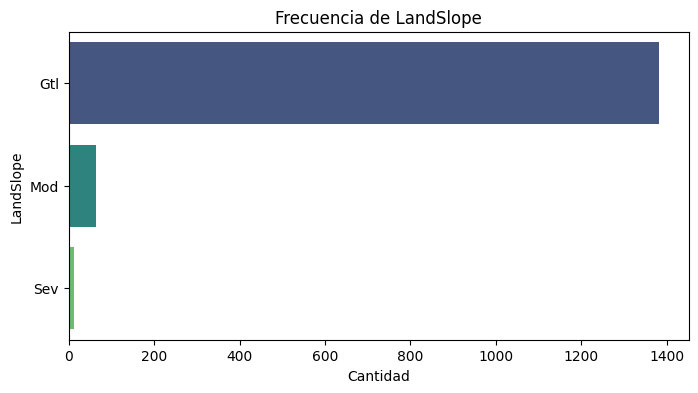

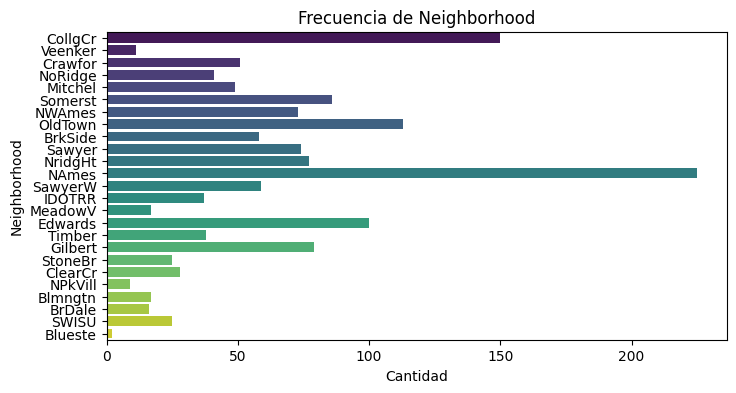

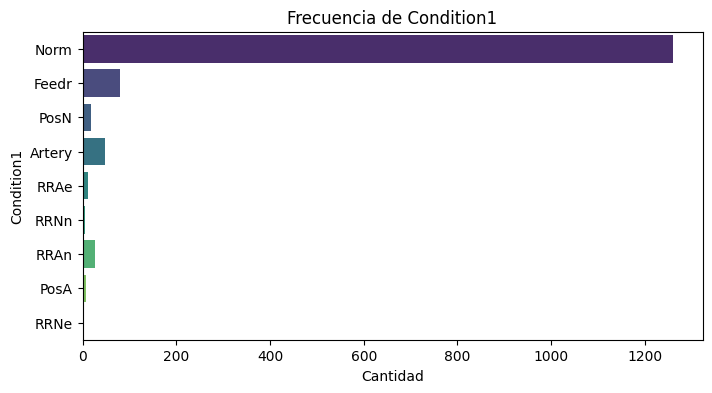

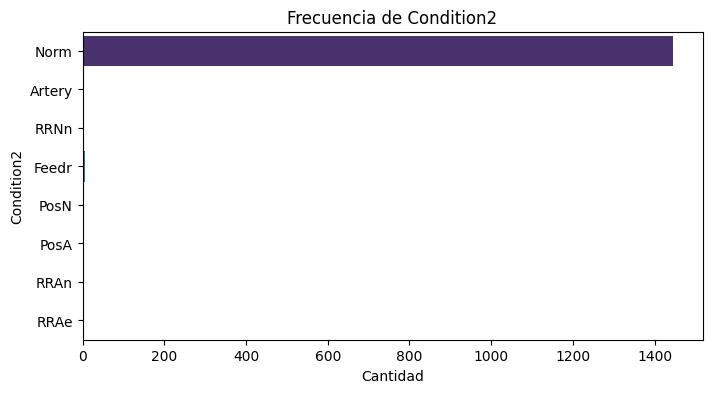

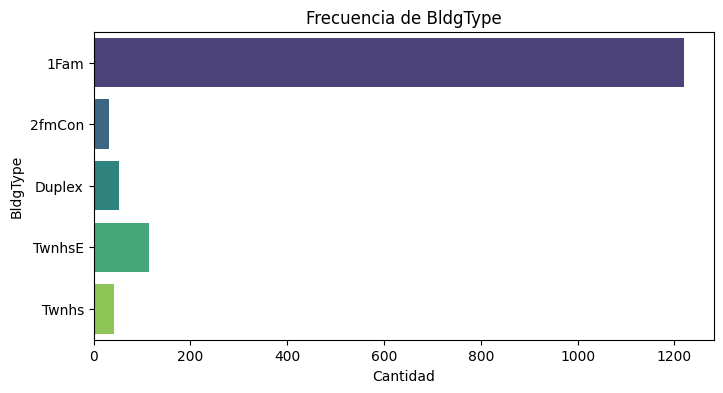

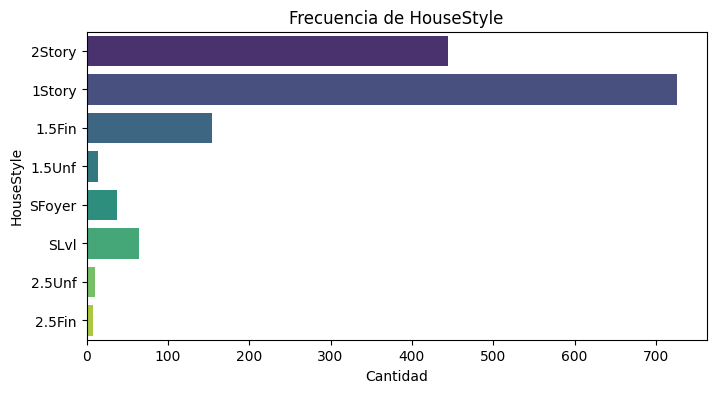

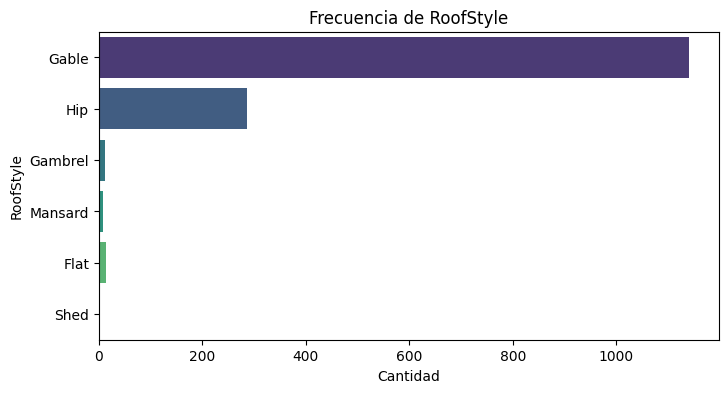

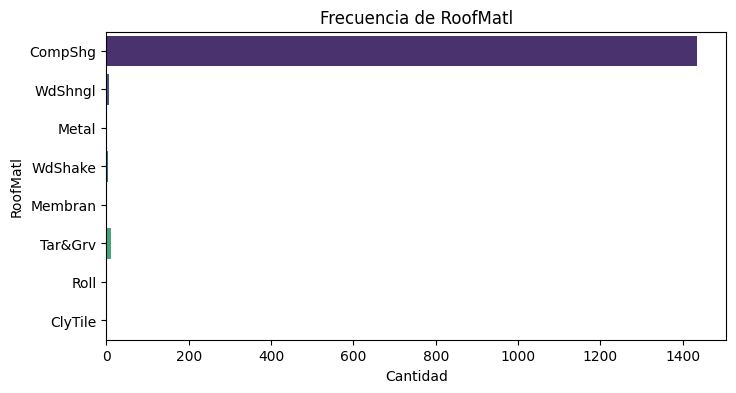

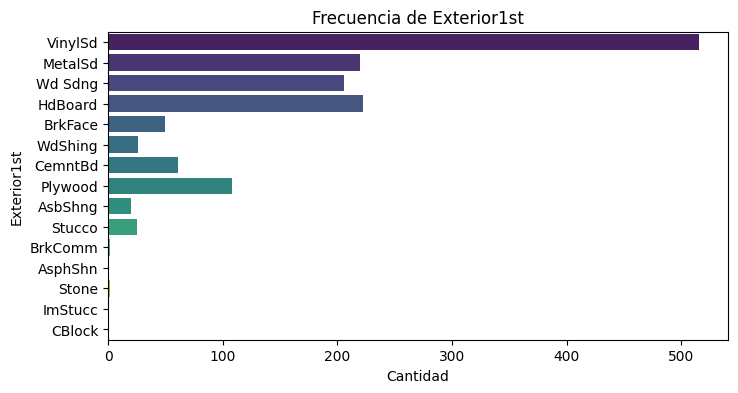

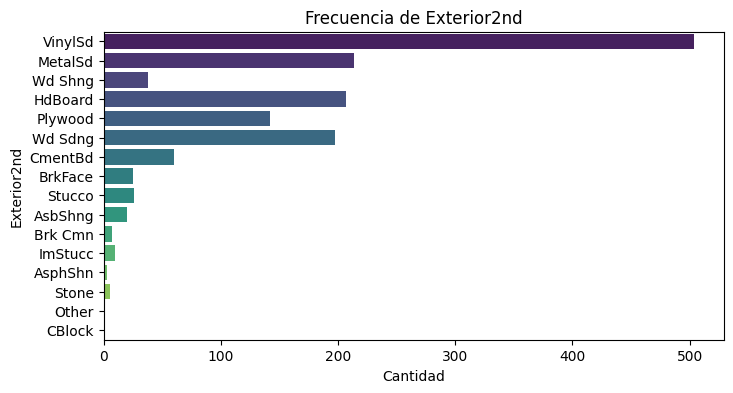

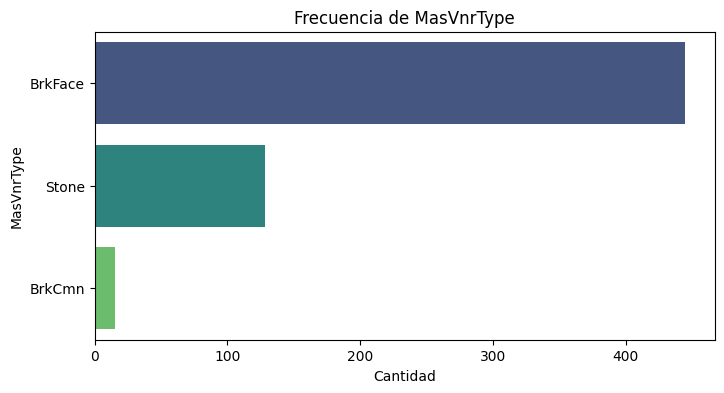

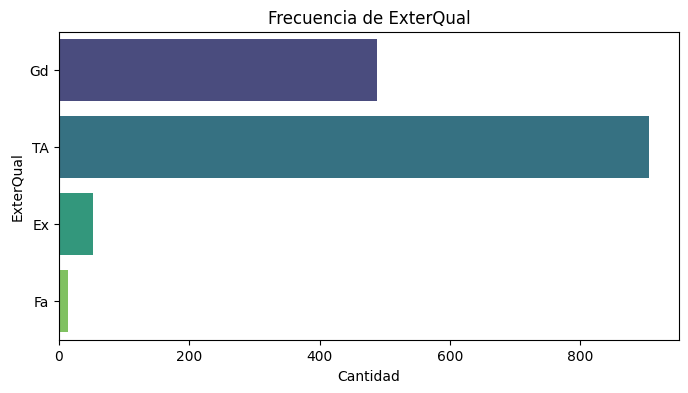

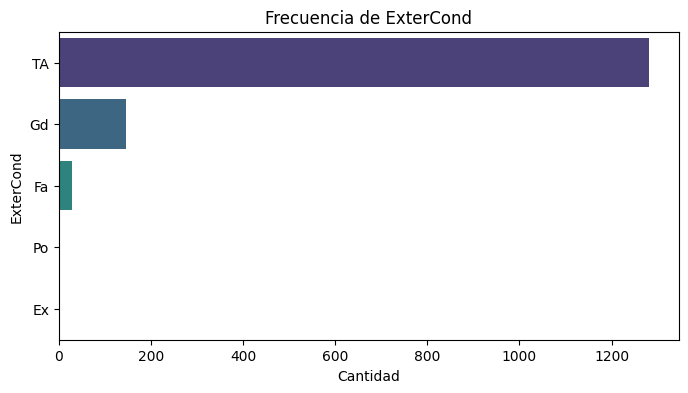

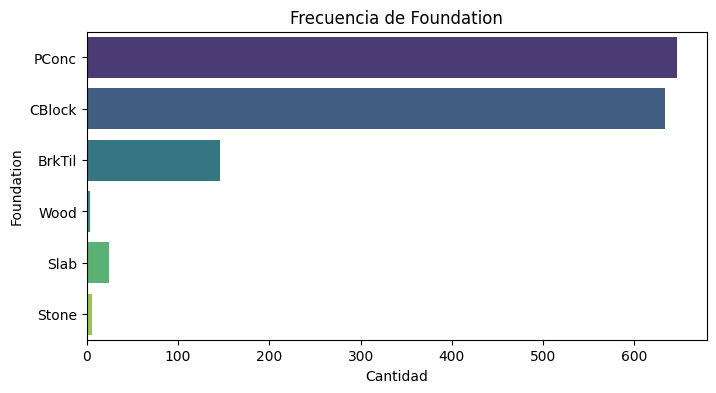

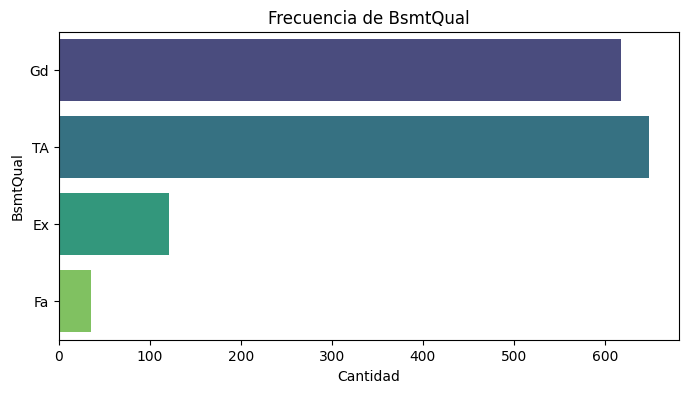

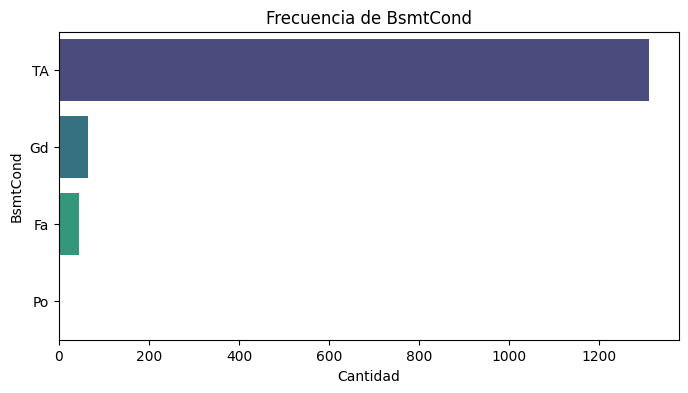

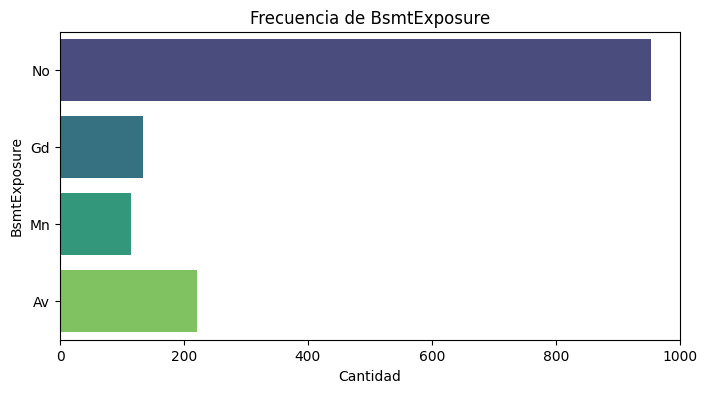

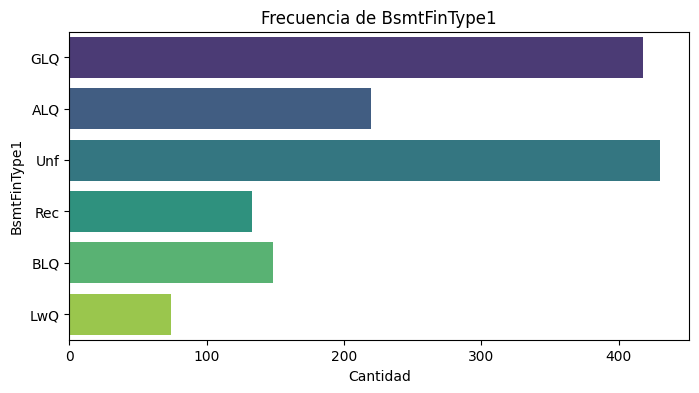

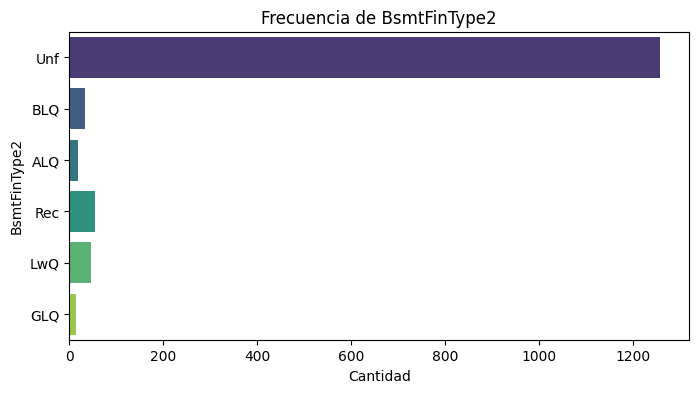

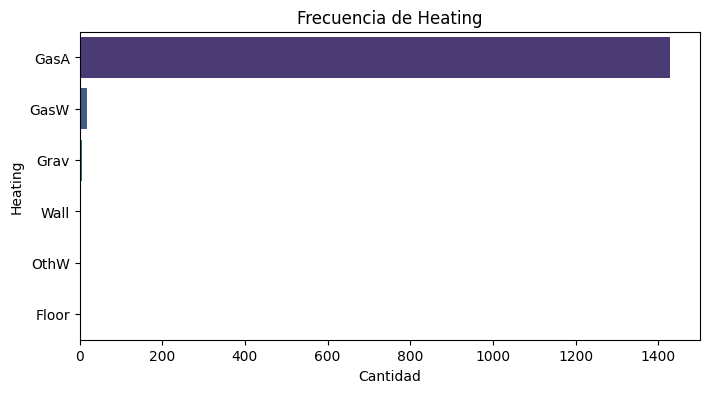

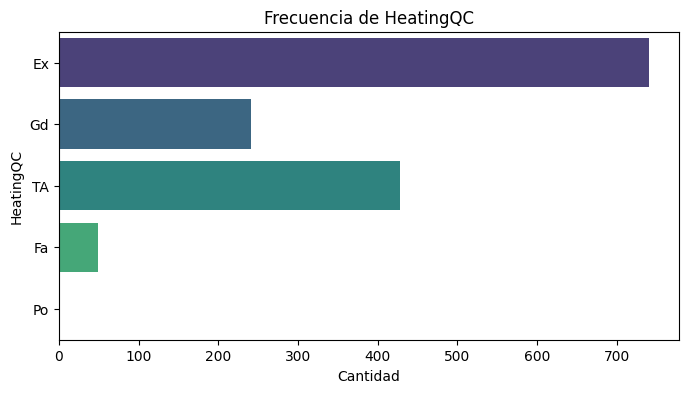

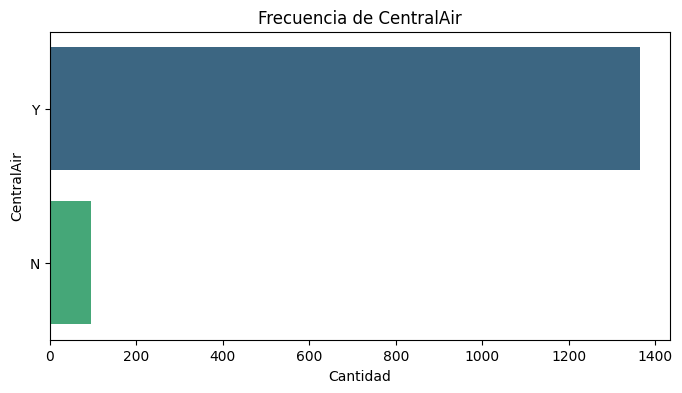

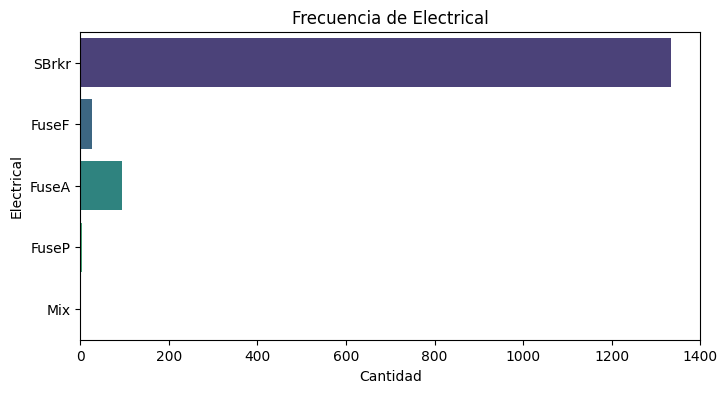

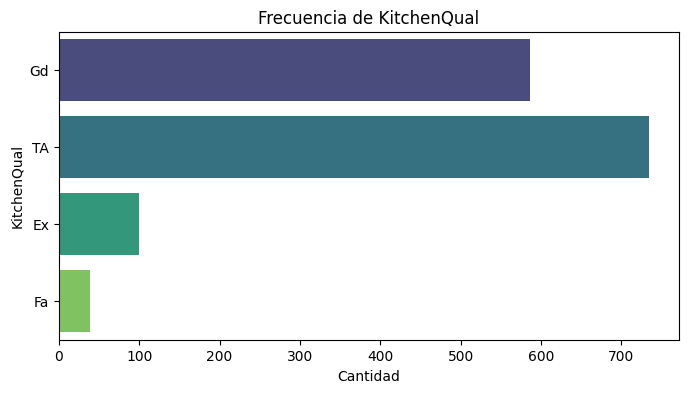

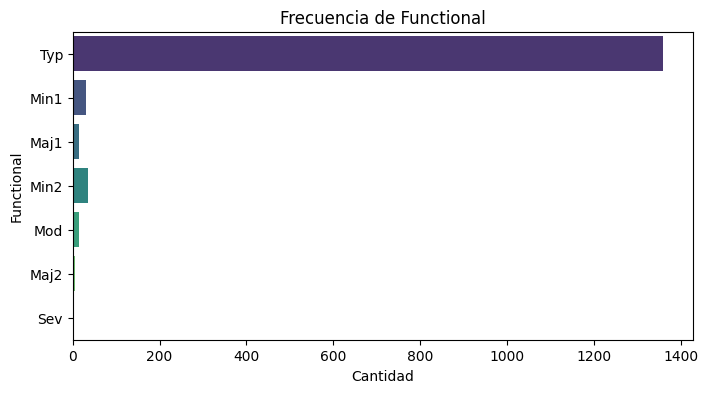

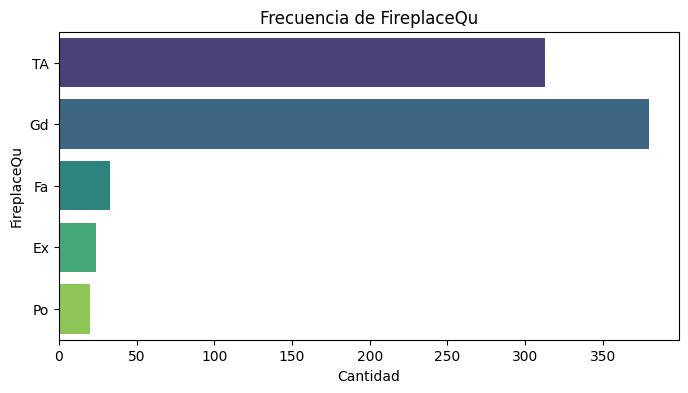

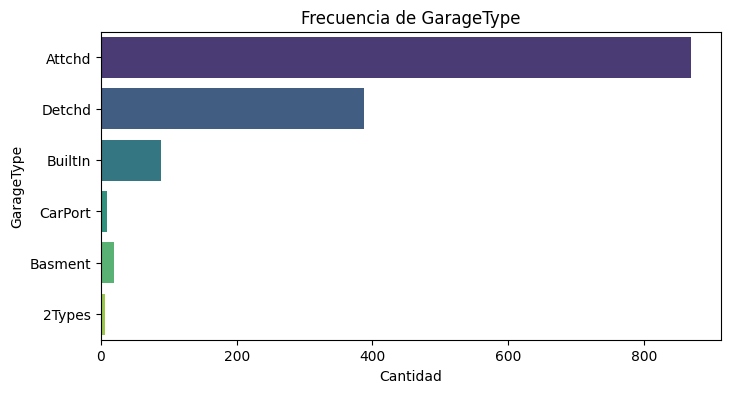

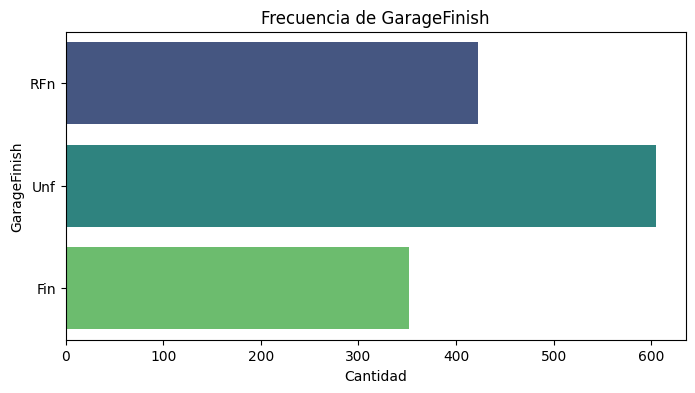

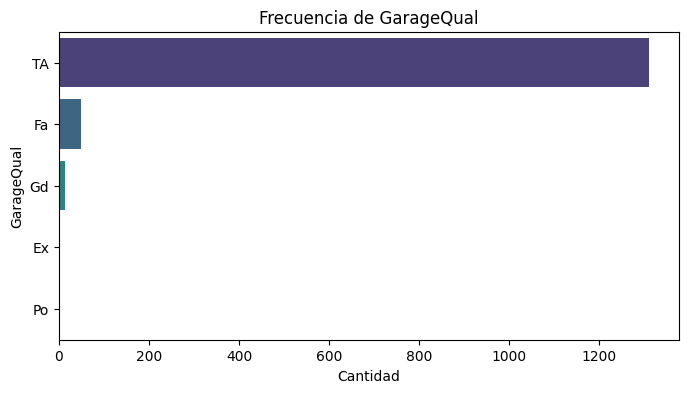

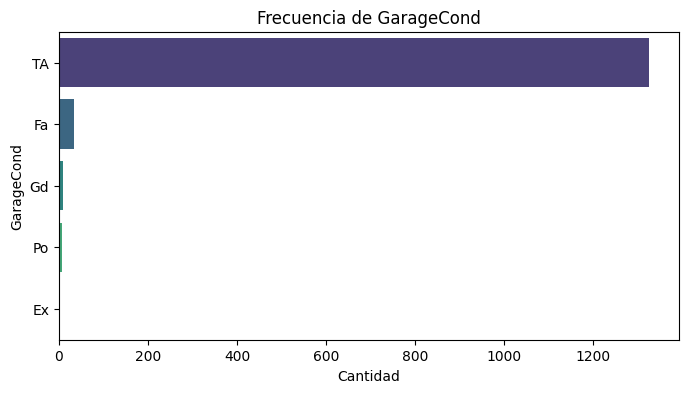

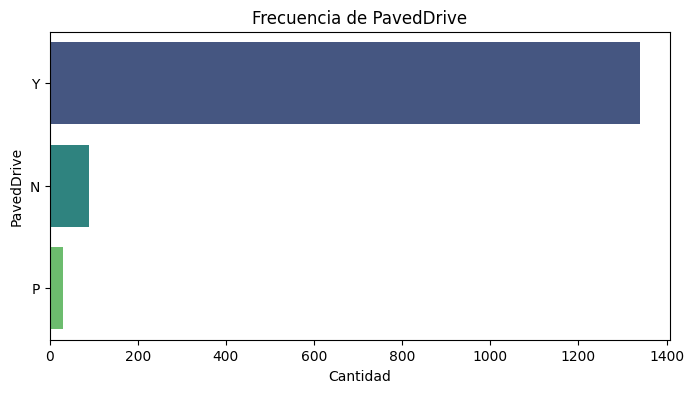

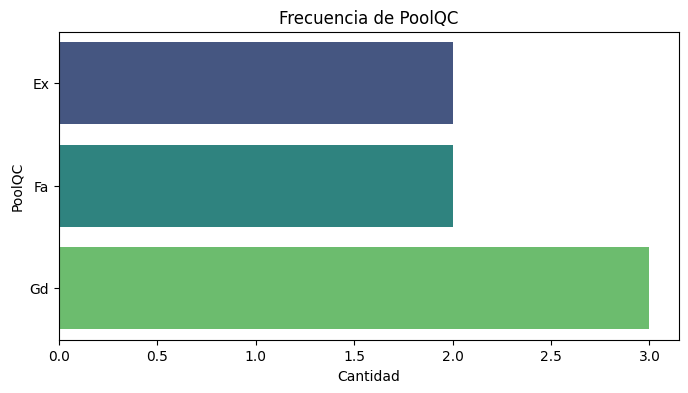

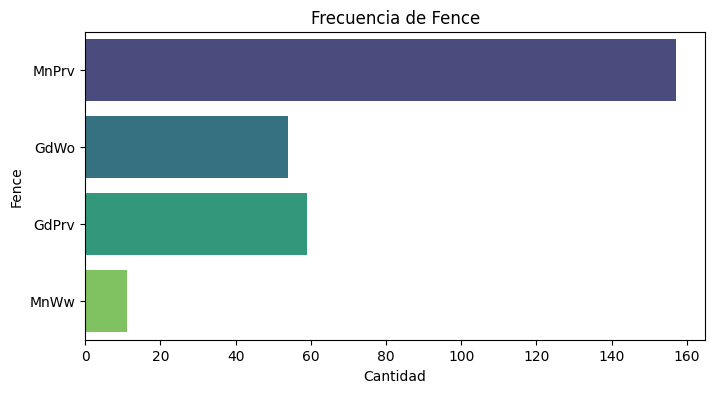

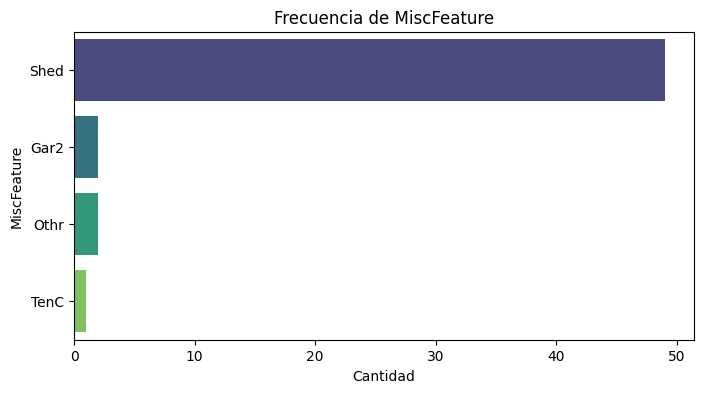

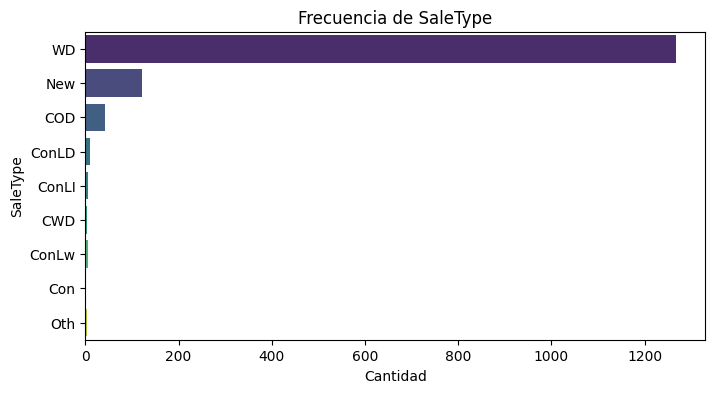

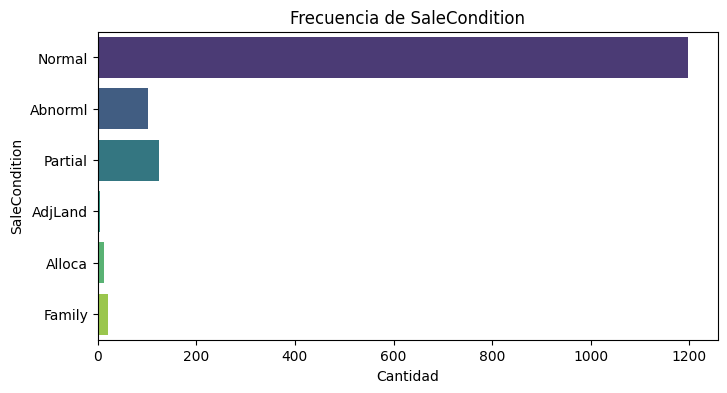

In [28]:
df_categorico = df.select_dtypes(include=["object"])

for col in df_categorico.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], hue=df[col], palette="viridis", legend=False)
    plt.title(f"Frecuencia de {col}")
    plt.xlabel("Cantidad")
    plt.ylabel(col)
    plt.show()